<a href="https://colab.research.google.com/github/Srinivas1258/ML-DL/blob/master/Image_to_text/image_to_text_converter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -r drive/MyDrive/Colab_Notebooks/Assignment_Data/ .

In [3]:
!ls -lrth Assignment_Data/

total 12K
dr-x------ 4 root root 4.0K Aug  5 04:33 D2
dr-x------ 4 root root 4.0K Aug  5 04:33 D1
dr-x------ 4 root root 4.0K Aug  5 04:33 D3


In [4]:
imgs_path='Assignment_Data/D1/IMAGES/'
labels_path='Assignment_Data/D1/TEXT_LABELS/'
# ! mv Assignment_Data/D1/TEXT_LABELS/*.gui Assignment_Data/D1/TEXT_LABELS/*.txt

In [5]:
# ! for f in Assignment_Data/D1/TEXT_LABELS/*.gui; do mv "$f" "$f.txt"; done

In [6]:
labels_path

'Assignment_Data/D1/TEXT_LABELS/'

In [7]:
import os
for filename in sorted(os.listdir(labels_path)):
  full_path=os.path.join(labels_path,filename)
  os.rename(full_path,full_path[:-3]+'txt')

# 2.A

In [8]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [9]:
# load vgg16 model
model = VGG16()
# restructure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summarize
print(model.summary())

553476096/553467096 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [10]:
# extract features from image
features = {}
# directory = os.path.join(BASE_DIR, 'Images')
directory=imgs_path

for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature

  0%|          | 0/300 [00:00<?, ?it/s]

In [11]:
captions_doc=[]
for file in os.listdir(labels_path):


    with open(os.path.join(labels_path,file), 'r') as f:
      # next(f)
      captions_doc.append(f.read())
print(captions_doc)

['header {\nbtn-active, btn-inactive\n}\nrow {\nsingle {\nsmall-title, text, btn-red\n}\n}\nrow {\ndouble {\nsmall-title, text, btn-green\n}\ndouble {\nsmall-title, text, btn-orange\n}\n}\nrow {\nquadruple {\nsmall-title, text, btn-orange\n}\nquadruple {\nsmall-title, text, btn-red\n}\nquadruple {\nsmall-title, text, btn-orange\n}\nquadruple {\nsmall-title, text, btn-orange\n}\n}\n', 'header {\nbtn-active, btn-inactive, btn-inactive\n}\nrow {\nquadruple {\nsmall-title, text, btn-orange\n}\nquadruple {\nsmall-title, text, btn-orange\n}\nquadruple {\nsmall-title, text, btn-orange\n}\nquadruple {\nsmall-title, text, btn-green\n}\n}\nrow {\nsingle {\nsmall-title, text, btn-red\n}\n}\nrow {\ndouble {\nsmall-title, text, btn-green\n}\ndouble {\nsmall-title, text, btn-green\n}\n}\n', 'header {\nbtn-inactive, btn-active\n}\nrow {\ndouble {\nsmall-title, text, btn-green\n}\ndouble {\nsmall-title, text, btn-red\n}\n}\nrow {\nsingle {\nsmall-title, text, btn-red\n}\n}\n', 'header {\nbtn-active, b

In [12]:
len(captions_doc)

300

In [13]:
mapping={}
for line,image in zip(captions_doc,os.listdir(imgs_path)):
    # print(line,image)
    image_id = image.split('.')[0]
    # convert caption list to string
    # caption = " ".join(line)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(line)


In [14]:
mapping

{'01357379-D6C2-4B01-AA66-C8790642D0B1': ['header {\nbtn-inactive, btn-inactive, btn-inactive, btn-active, btn-inactive\n}\nrow {\nquadruple {\nsmall-title, text, btn-red\n}\nquadruple {\nsmall-title, text, btn-orange\n}\nquadruple {\nsmall-title, text, btn-red\n}\nquadruple {\nsmall-title, text, btn-orange\n}\n}\nrow {\nsingle {\nsmall-title, text, btn-green\n}\n}\nrow {\ndouble {\nsmall-title, text, btn-red\n}\ndouble {\nsmall-title, text, btn-orange\n}\n}\n'],
 '01B6145F-B88B-4FF8-B7D7-BB8A321EDA85': ['header {\nbtn-inactive, btn-inactive, btn-active, btn-inactive, btn-inactive\n}\nrow {\nsingle {\nsmall-title, text, btn-orange\n}\n}\nrow {\nquadruple {\nsmall-title, text, btn-orange\n}\nquadruple {\nsmall-title, text, btn-orange\n}\nquadruple {\nsmall-title, text, btn-red\n}\nquadruple {\nsmall-title, text, btn-orange\n}\n}\nrow {\nsingle {\nsmall-title, text, btn-red\n}\n}\n'],
 '02C4C780-79EA-43F1-B2AE-3A2C757F874C': ['header {\nbtn-inactive, btn-inactive, btn-active\n}\nrow {\nd

In [15]:
len(mapping)

300

In [16]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc., 
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'start ' + " ".join([word for word in caption.split() if len(word)>1]) + ' end'
            captions[i] = caption

In [17]:
mapping['01B6145F-B88B-4FF8-B7D7-BB8A321EDA85']

['header {\nbtn-inactive, btn-inactive, btn-active, btn-inactive, btn-inactive\n}\nrow {\nsingle {\nsmall-title, text, btn-orange\n}\n}\nrow {\nquadruple {\nsmall-title, text, btn-orange\n}\nquadruple {\nsmall-title, text, btn-orange\n}\nquadruple {\nsmall-title, text, btn-red\n}\nquadruple {\nsmall-title, text, btn-orange\n}\n}\nrow {\nsingle {\nsmall-title, text, btn-red\n}\n}\n']

In [18]:
# preprocess the text
clean(mapping)

In [19]:
# after preprocess of text
mapping['01B6145F-B88B-4FF8-B7D7-BB8A321EDA85']

['start header btn-inactive, btn-inactive, btn-active, btn-inactive, btn-inactive row single small-title, text, btn-orange row quadruple small-title, text, btn-orange quadruple small-title, text, btn-orange quadruple small-title, text, btn-red quadruple small-title, text, btn-orange row single small-title, text, btn-red end']

In [20]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [21]:
len(all_captions)

300

In [22]:
all_captions[:10]

['start header btn-active, btn-inactive row single small-title, text, btn-red row double small-title, text, btn-green double small-title, text, btn-orange row quadruple small-title, text, btn-orange quadruple small-title, text, btn-red quadruple small-title, text, btn-orange quadruple small-title, text, btn-orange end',
 'start header btn-active, btn-inactive, btn-inactive row quadruple small-title, text, btn-orange quadruple small-title, text, btn-orange quadruple small-title, text, btn-orange quadruple small-title, text, btn-green row single small-title, text, btn-red row double small-title, text, btn-green double small-title, text, btn-green end',
 'start header btn-inactive, btn-active row double small-title, text, btn-green double small-title, text, btn-red row single small-title, text, btn-red end',
 'start header btn-active, btn-inactive row double small-title, text, btn-green double small-title, text, btn-orange row single small-title, text, btn-red row double small-title, text

In [23]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [24]:
vocab_size

17

In [25]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

57

In [26]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [27]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

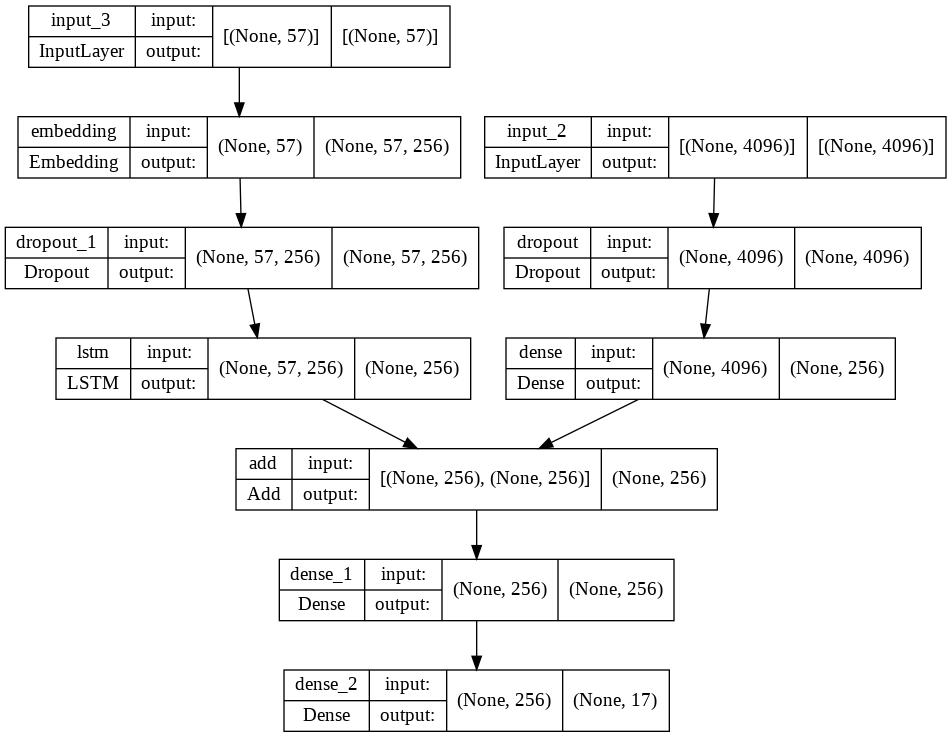

In [28]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

In [29]:
# train the model
epochs = 20
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

8/8 [==============================] - 2s 256ms/step - loss: 0.3429


In [30]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [31]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'start'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'end':
            break
      
    return in_text

In [32]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length) 
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
    
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/30 [00:00<?, ?it/s]

BLEU-1: 0.197227
BLEU-2: 0.111984


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [37]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "01357379-D6C2-4B01-AA66-C8790642D0B1.png"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(imgs_path, image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
start header btn-inactive, btn-active row quadruple small-title, text, btn-orange quadruple small-title, text, btn-green quadruple small-title, text, btn-green quadruple small-title, text, btn-orange row double small-title, text, btn-orange double small-title, text, btn-green end
--------------------Predicted--------------------
start header btn inactive btn active btn inactive btn inactive btn inactive row double small title text btn orange double small title text btn orange row quadruple small title text btn orange quadruple small title text btn orange quadruple small title text btn orange row single small title text btn orange end


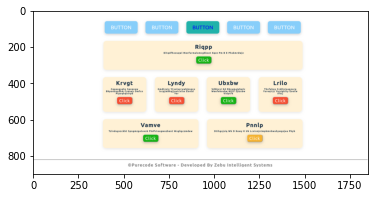

In [39]:
generate_caption("08451415-0C4B-4650-A2D0-2381AA7DBC71.png")

# 2.B

In [40]:
imgs_path2='Assignment_Data/D2/IMAGES/'
labels_path2='Assignment_Data/D2/TEXT_LABELS/'

In [41]:
for filename in sorted(os.listdir(labels_path)):
  full_path=os.path.join(labels_path,filename)
  os.rename(full_path,full_path[:-3]+'txt')

In [47]:
# load vgg16 model
model_1 = VGG16()
# restructure the model
model_1 = Model(inputs=model_1.inputs, outputs=model_1.layers[-2].output)
# summarize
print(model_1.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [52]:
# extract features from image
features2 = {}
# directory = os.path.join(BASE_DIR, 'Images')
directory=imgs_path2

for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model_1.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features2[image_id] = feature

  0%|          | 0/300 [00:00<?, ?it/s]

In [49]:
captions_doc2=[]
for file in os.listdir(labels_path2):


    with open(os.path.join(labels_path2,file), 'r') as f:
      # next(f)
      captions_doc2.append(f.read())
print(captions_doc2)

['header {\nsearch-bar, cart-link, burger-link\n}\nsidebar {\nck-box, slider, icons\n}\ncanvas-header {\nbtn-active\n}\nrow {\nquadruple {\nsmall-title, text, btn-red\n}\nquadruple {\nsmall-title, text, btn-orange\n}\nquadruple {\nsmall-title, text, btn-red\n}\nquadruple {\nsmall-title, text, btn-orange\n}\n}\nrow {\ndouble {\nsmall-title, text, btn-orange\n}\ndouble {\nsmall-title, text, btn-red\n}\n}\nrow {\nsingle {\nsmall-title, text, btn-orange\n}\n}\n', 'header {\npage-title, cart-link, burger-link\n}\nsidebar {\nck-box, dropdn\n}\ncanvas-header {\n}\n', 'header {\nsearch-bar, cart-link, burger-link\n}\nsidebar {\nmedium-title, ck-box, radio, dropdn, slider, rating\n}\ncanvas-header {\nbtn-inactive, btn-inactive, btn-inactive, btn-inactive, btn-active\n}\nrow {\nquadruple {\nsmall-title, text, btn-green\n}\nquadruple {\nsmall-title, text, btn-green\n}\nquadruple {\nsmall-title, text, btn-orange\n}\nquadruple {\nsmall-title, text, btn-green\n}\n}\n', 'header {\npage-title, search-

In [53]:
mapping2={}
for line,image in zip(captions_doc2,os.listdir(imgs_path2)):
    # print(line,image)
    image_id = image.split('.')[0]
    # convert caption list to string
    # caption = " ".join(line)
    # create list if needed
    if image_id not in mapping2:
        mapping2[image_id] = []
    # store the caption
    mapping2[image_id].append(line)

In [54]:
def clean(mapping):
    for key, captions in mapping2.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc., 
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'start ' + " ".join([word for word in caption.split() if len(word)>1]) + ' end'
            captions[i] = caption

In [55]:
clean(mapping2)

In [56]:
all_captions2 = []
for key in mapping2:
    for caption in mapping2[key]:
        all_captions2.append(caption)

In [57]:
tokenizer.fit_on_texts(all_captions2)
vocab_size2 = len(tokenizer.word_index) + 1

In [58]:
max_length2 = max(len(caption.split()) for caption in all_captions2)
max_length2

49

In [59]:
image_ids2 = list(mapping2.keys())
split2 = int(len(image_ids2) * 0.90)
train2 = image_ids2[:split2]
test2 = image_ids2[split2:]

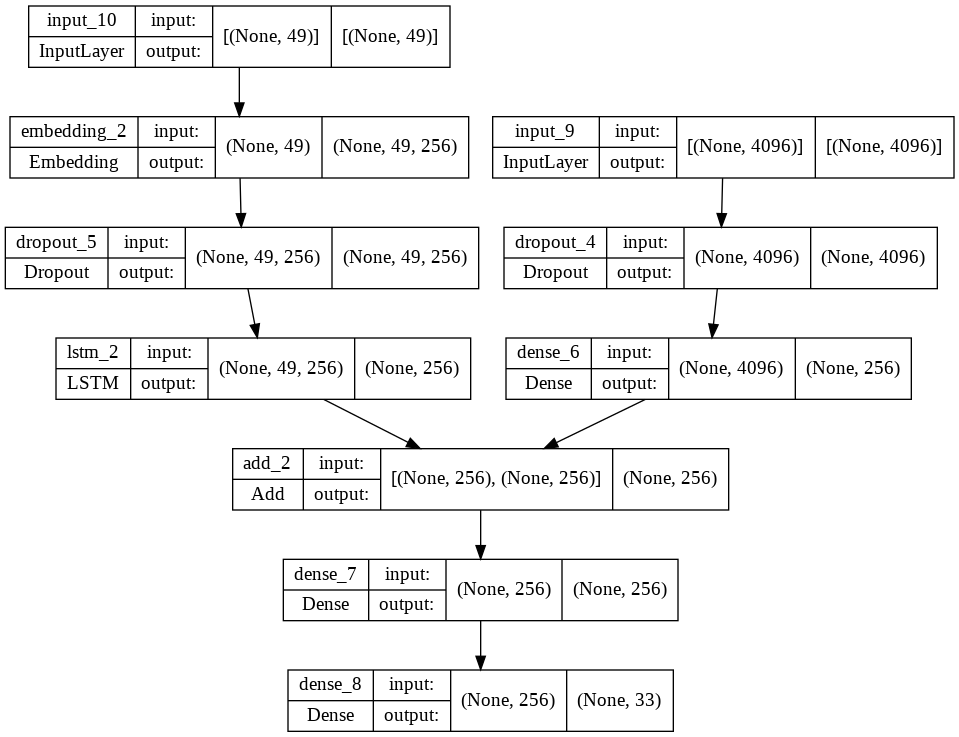

In [62]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length2,))
se1 = Embedding(vocab_size2, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size2, activation='softmax')(decoder2)

model2 = Model(inputs=[inputs1, inputs2], outputs=outputs)
model2.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model2, show_shapes=True)

In [63]:
# train the model
epochs = 10
batch_size = 32
steps = len(train2) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train2, mapping2, features2, tokenizer, max_length2, vocab_size2, batch_size)
    # fit for one epoch
    model2.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

8/8 [==============================] - 2s 244ms/step - loss: 1.0118


In [64]:
actual2, predicted2 = list(), list()

for key in tqdm(test2):
    # get actual caption
    captions = mapping2[key]
    # predict the caption for image
    y_pred = predict_caption(model2, features2[key], tokenizer, max_length2) 
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual2.append(actual_captions)
    predicted2.append(y_pred)
    
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual2, predicted2, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual2, predicted2, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/30 [00:00<?, ?it/s]

BLEU-1: 0.159915
BLEU-2: 0.083933


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


# 2.C

In [65]:
imgs_path3='Assignment_Data/D3/IMAGES/'
labels_path3='Assignment_Data/D3/TEXT_LABELS/'

In [66]:
for filename in sorted(os.listdir(labels_path3)):
  full_path=os.path.join(labels_path3,filename)
  os.rename(full_path,full_path[:-3]+'txt')

In [76]:
def preprocess(imgs_path3,labels_path3):
  features3 = {}
  # directory = os.path.join(BASE_DIR, 'Images')
  directory=imgs_path3

  for img_name in tqdm(os.listdir(directory)):
      # load the image from file
      img_path = directory + '/' + img_name
      image = load_img(img_path, target_size=(224, 224))
      # convert image pixels to numpy array
      image = img_to_array(image)
      # reshape data for model
      image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
      # preprocess image for vgg
      image = preprocess_input(image)
      # extract features
      feature = model_1.predict(image, verbose=0)
      # get image ID
      image_id = img_name.split('.')[0]
      # store feature
      features3[image_id] = feature



      captions_doc3=[]
      for file in os.listdir(labels_path3):


          with open(os.path.join(labels_path3,file), 'r') as f:
            # next(f)
            captions_doc3.append(f.read())
      # print(captions_doc2)




      mapping3={}
      for line,image in zip(captions_doc3,os.listdir(imgs_path3)):
          # print(line,image)
          image_id = image.split('.')[0]
          # convert caption list to string
          # caption = " ".join(line)
          # create list if needed
          if image_id not in mapping3:
              mapping3[image_id] = []
          # store the caption
          mapping3[image_id].append(line)


  return (features3,mapping3)

features3,mapping3=preprocess(imgs_path3,labels_path3)

  0%|          | 0/300 [00:00<?, ?it/s]

In [77]:
clean(mapping3)

In [79]:
# mapping3

In [73]:
all_captions3 = []
for key in mapping3:
    for caption in mapping3[key]:
        all_captions3.append(caption)


tokenizer.fit_on_texts(all_captions3)
vocab_size3 = len(tokenizer.word_index) + 1


max_length3 = max(len(caption.split()) for caption in all_captions3)
# max_length3

image_ids3 = list(mapping3.keys())
split3 = int(len(image_ids3) * 0.90)
train3 = image_ids3[:split3]
test3 = image_ids3[split3:]


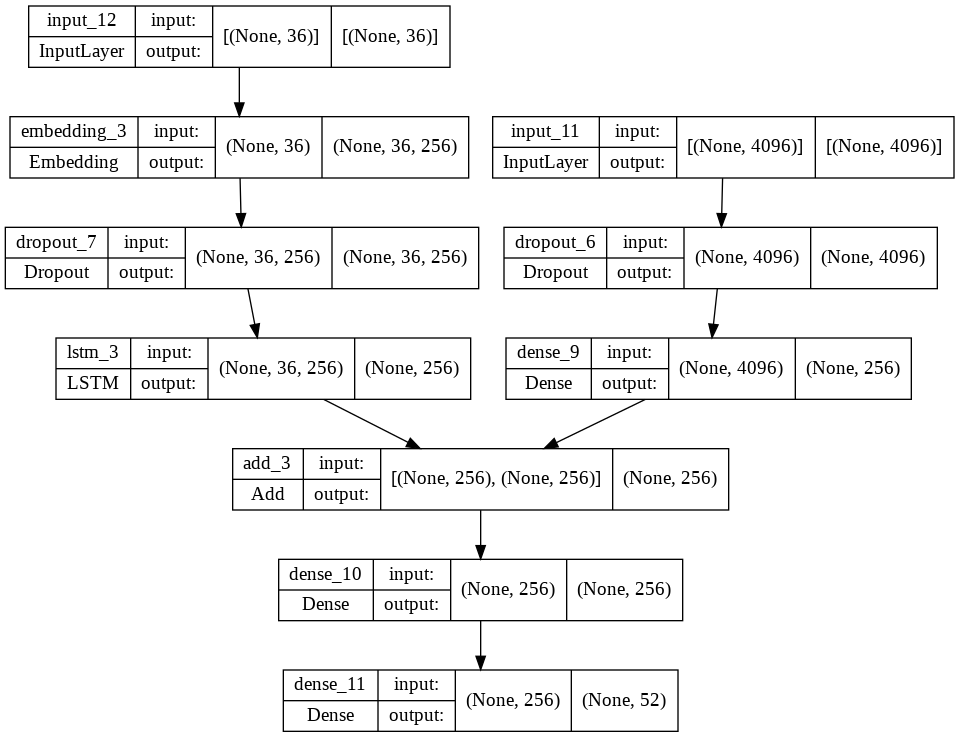

In [74]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length3,))
se1 = Embedding(vocab_size3, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size3, activation='softmax')(decoder2)

model3 = Model(inputs=[inputs1, inputs2], outputs=outputs)
model3.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model3, show_shapes=True)

In [81]:
# train the model
epochs = 10
batch_size = 32
steps = len(train3) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train3, mapping3, features3, tokenizer, max_length3, vocab_size3, batch_size)
    # fit for one epoch
    model3.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

8/8 [==============================] - 2s 203ms/step - loss: 1.3851


In [82]:
actual3, predicted3 = list(), list()

for key in tqdm(test3):
    # get actual caption
    captions = mapping3[key]
    # predict the caption for image
    y_pred = predict_caption(model3, features3[key], tokenizer, max_length3) 
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual3.append(actual_captions)
    predicted3.append(y_pred)
    
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual3, predicted3, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual3, predicted3, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/30 [00:00<?, ?it/s]

BLEU-1: 0.240541
BLEU-2: 0.074619


# Task 3

In [83]:
!mkdir Assignment_Data/TOT_images

!mkdir Assignment_Data/ToT_labels

!cp Assignment_Data/*/IMAGES/* Assignment_Data/TOT_images/
!cp Assignment_Data/*/TEXT_LABELS/* Assignment_Data/ToT_labels/

In [85]:
imgs_path4='Assignment_Data/TOT_images'
labels_path4='Assignment_Data/ToT_labels'


In [87]:
!ls lrth '$imgs_path4' | wc -l

ls: cannot access 'lrth': No such file or directory
901


In [88]:
features4,mapping4=preprocess(imgs_path4,labels_path4)

  0%|          | 0/900 [00:00<?, ?it/s]

In [89]:
clean(mapping4)

In [90]:
all_captions4 = []
for key in mapping4:
    for caption in mapping4[key]:
        all_captions4.append(caption)


tokenizer.fit_on_texts(all_captions4)
vocab_size4 = len(tokenizer.word_index) + 1


max_length4 = max(len(caption.split()) for caption in all_captions4)
# max_length3

image_ids4 = list(mapping4.keys())
split4 = int(len(image_ids4) * 0.90)
train4 = image_ids4[:split4]
test4 = image_ids4[split4:]


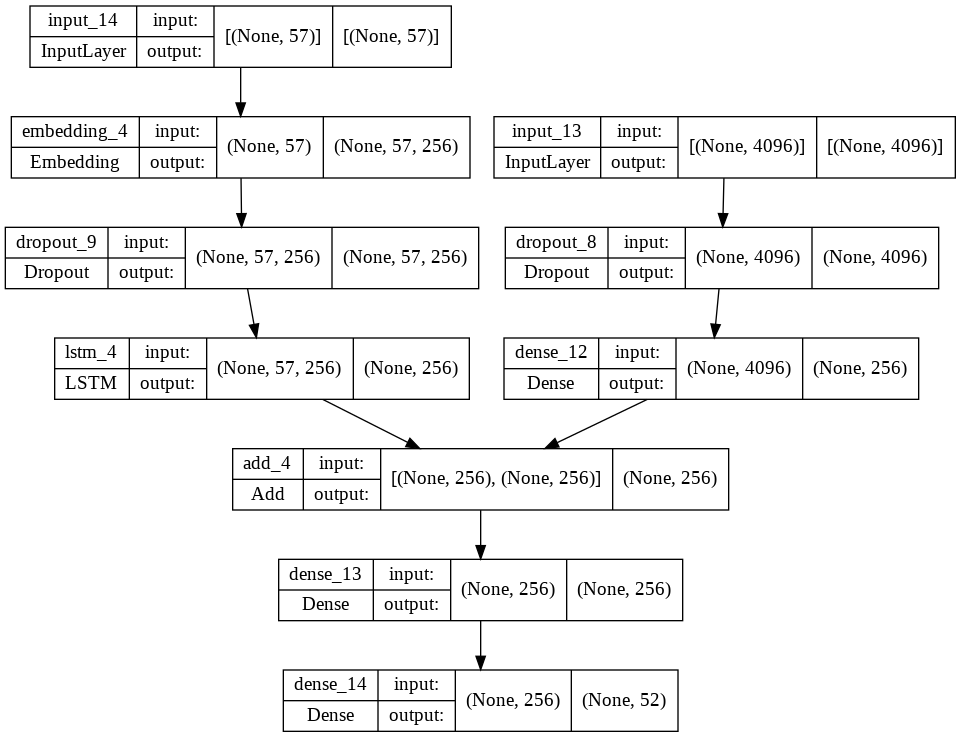

In [91]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length4,))
se1 = Embedding(vocab_size4, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size4, activation='softmax')(decoder2)

model4 = Model(inputs=[inputs1, inputs2], outputs=outputs)
model4.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model4, show_shapes=True)

In [92]:
# train the model
epochs = 10
batch_size = 32
steps = len(train4) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train4, mapping4, features4, tokenizer, max_length4, vocab_size4, batch_size)
    # fit for one epoch
    model4.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

25/25 [==============================] - 7s 266ms/step - loss: 0.5357


In [93]:
actual4, predicted4 = list(), list()

for key in tqdm(test4):
    # get actual caption
    captions = mapping4[key]
    # predict the caption for image
    y_pred = predict_caption(model4, features4[key], tokenizer, max_length4) 
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual4.append(actual_captions)
    predicted4.append(y_pred)
    
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual4, predicted4, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual4, predicted4, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/90 [00:00<?, ?it/s]

BLEU-1: 0.115680
BLEU-2: 0.053926


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
